# Figure 1

lensing_results/All/
pont 0
$13.21^{+0.33}_{-0.21}$ & 
$5.67^{+7.02}_{-3.24}$ & 
$0.68^{+0.37}_{-0.41}$ & 
$0.37^{+0.36}_{-0.21}$ & 
$1.53^{+0.51}_{-0.53}$ & 
pont 1
$13.36^{+0.14}_{-0.12}$ & 
$6.34^{+5.34}_{-2.50}$ & 
$0.46^{+0.44}_{-0.31}$ & 
$0.57^{+0.28}_{-0.26}$ & 
$2.84^{+0.50}_{-0.52}$ & 
pont 2
$13.56^{+0.12}_{-0.14}$ & 
$12.26^{+5.20}_{-5.44}$ & 
$0.62^{+0.17}_{-0.13}$ & 
$0.31^{+0.19}_{-0.09}$ & 
$1.62^{+0.45}_{-0.45}$ & 
pont 3
$13.60^{+0.11}_{-0.11}$ & 
$10.49^{+5.25}_{-3.96}$ & 
$0.58^{+0.26}_{-0.15}$ & 
$0.45^{+0.21}_{-0.13}$ & 
$1.89^{+0.47}_{-0.47}$ & 
pont 4
$13.69^{+0.12}_{-0.10}$ & 
$10.96^{+5.06}_{-3.87}$ & 
$0.68^{+0.31}_{-0.27}$ & 
$0.48^{+0.23}_{-0.14}$ & 
$1.72^{+0.49}_{-0.50}$ & 


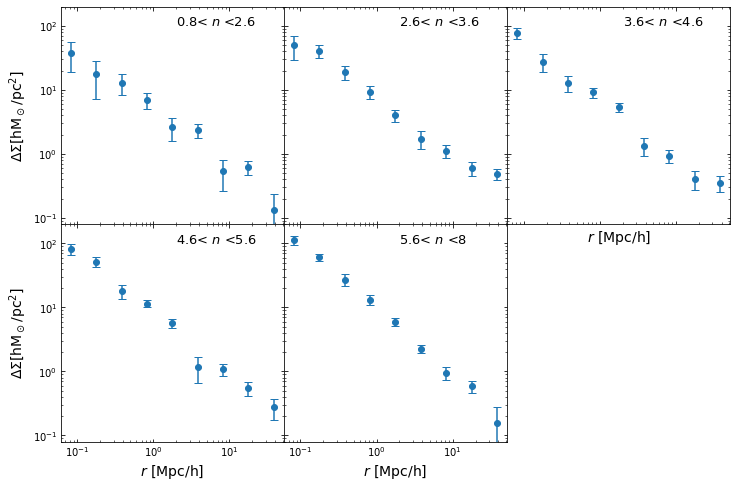

In [1]:
import numpy as np
import matplotlib.pyplot as plt

bound=[0.8,2.6,3.6,4.6,5.6,8]

################### read the data #############################

fig_path="lensing_results/All/"
result=np.load(fig_path+"parameter_results-5par.npy")

nsig=5
bl=5
print(fig_path)
for i in range(result.shape[0]):
    print('pont',i)
    for j in range(result.shape[1]):
        para=result[i,j,:]
        print("$"+str(format(para[0], '.2f'))+"^{+"+str(format(para[1], '.2f'))+"}_{-"+str(format(para[2], '.2f'))+"}$ & ")

nrbin=9
rbin=np.logspace(np.log10(0.05),np.log10(50.),nrbin+1)
r=(rbin[1:]**3-rbin[:-1]**3)/(rbin[1:]**2-rbin[:-1]**2)*2./3.

fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
for isig in range(nsig):
    results_path=fig_path+"subsample"+str(isig+1)+"/"
    xi=np.loadtxt(results_path+"mean_Delta_Sigma.dat")
    cov=np.loadtxt(results_path+"Cov_Delta_Sigma.dat")
    ndata0=len(xi)
    
    err=np.zeros(ndata0)
    for i in range(ndata0):
        err[i]=np.sqrt(cov[i,i])
        
    ax1=int(isig/3)
    ax2=isig%3
    ax[ax1,ax2].errorbar(r,xi,yerr=err,fmt='o',capsize=4)
    ax[ax1,ax2].set_ylim(0.08,200)
    ax[ax1,ax2].set_yscale('log')
    ax[ax1,ax2].set_xscale('log')
    ax[ax1, ax2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    if(isig == 5):
        ax[ax1,ax2].text(1,100,str(bound[isig])+'< $n$ <'+str(bound[isig+1]),fontsize=13)
    else:
        ax[ax1,ax2].text(2,100,str(bound[isig])+'< $n$ <'+str(bound[isig+1]),fontsize=13)
    
ax[1,2].axis('off')
ax[0,0].set_ylabel(r'$\Delta \Sigma [{\rm h M_\odot /pc}^2]$',fontsize=14)
ax[1,0].set_ylabel(r'$\Delta \Sigma [{\rm h M_\odot /pc}^2]$',fontsize=14)
ax[1,0].set_xlabel(r'$r$ [Mpc/h]',fontsize=14)
ax[1,1].set_xlabel(r'$r$ [Mpc/h]',fontsize=14)
ax[0,2].set_xlabel(r'$r$ [Mpc/h]',fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(fig_path+'fit-paper-off.png',bbox_inches = 'tight',dpi=200)


# Figure 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import corner
import numpy as np 
import time
import matplotlib.lines as mlines

# ################# read the result data ############################

nsteps = 10000

sp_labels = [r'log$M_h$','$c$',r'$\sigma_s$',r'$f_c$',r'$b_h$']
fill_contours_l=[True,True,True,True,True]

CORNER_KWARGS = dict(
    smooth=0.99,
    label_kwargs=dict(fontsize=20),
    title_kwargs=dict(fontsize=20),
    #quantiles=[0.5-0.34, 0.5+0.34],
    levels=(0,0.68,0.95),
    plot_density=False,
    plot_datapoints=False,
    show_titles=False,
    max_n_ticks=3,
    labels = sp_labels
)


def overlaid_corner(samples_list, sample_labels, data_path,colors):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    print(n, _, ndim, max_len)

    """
    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )
    print(plot_range)
    """
    plot_range=[[12.500354407527041, 14.274695803624043], [0.9930208147606976, 19.99967777553482], [0.010009361393014407, 1.1999981155851578], [2.3539868563182687e-05, 0.9999984983593783], [1.9740889435571063e-05, 5.4162670530179335]]

    CORNER_KWARGS.update(range=plot_range)

    fig = corner.corner(
        samples_list[0],
        color=colors[0], 
        fill_contours=fill_contours_l[0],
        contour_kwargs={'alpha': 0.5},
        **CORNER_KWARGS
    )

    for idx in range(1, n):
        fig = corner.corner(
            samples_list[idx],
            color=colors[idx],
            fill_contours=fill_contours_l[idx],
            contour_kwargs={'alpha': 0.5},
            fig=fig,
            **CORNER_KWARGS
        )

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )
    plt.savefig(data_path,dpi=200,bbox_inches = 'tight')


num_par=len(sp_labels)
nburn=int(nsteps*0.1)
quantiles = np.array([16., 50., 84.])
results=np.zeros((5,num_par,3))
result_path1 = "lensing_results/All/"
    
bound=[0.8,2.6,3.6,4.6,5.6,8.]
samples=[]
lbs=[]
for isig in range(3):
    data_path1 = result_path1+"subsample"+str(isig+1)+"/"
    file_path1 = data_path1 + "chain_"+str(nsteps)+"_steps-intpl-M-c-rs-fc-bh.npz"
    data1 = np.load(file_path1)

    samples.append(np.array(data1['arr_0']))
    lbs.append(str(bound[isig])+'< $n$ <'+str(bound[isig+1]))
result_fig=result_path1+"/corner_"+str(nsteps)+"-M-c-rs-fc-bh-ppr-1.png"
overlaid_corner(samples,lbs, result_fig,['navy','r','g'])

samples=[]
lbs=[]
for isig in range(3,5):
    data_path1 = result_path1+"subsample"+str(isig+1)+"/"
    file_path1 = data_path1 + "chain_"+str(nsteps)+"_steps-intpl-M-c-rs-fc-bh.npz"
    data1 = np.load(file_path1)

    samples.append(np.array(data1['arr_0']))
    lbs.append(str(bound[isig])+'< $n$ <'+str(bound[isig+1]))
result_fig=result_path1+"/corner_"+str(nsteps)+"-M-c-rs-fc-bh-ppr-2.png"
overlaid_corner(samples,lbs, result_fig,['cyan','blueviolet'])


FileNotFoundError: [Errno 2] No such file or directory: 'lensing_results/All/subsample1/chain_10000_steps-intpl-M-c-rs-fc-bh.npz'

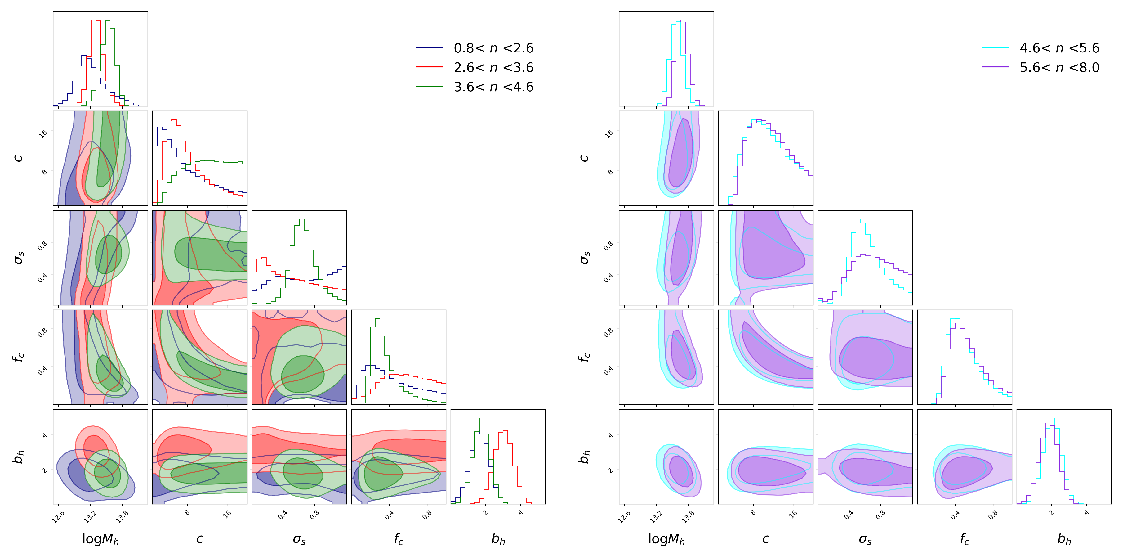

In [72]:
from matplotlib.pyplot import imread

image_path1 = result_path1 + "/corner_" + str(nsteps) + "-M-c-rs-fc-bh-ppr-1.png"
image_path2 = result_path1 + "/corner_" + str(nsteps) + "-M-c-rs-fc-bh-ppr-2.png"
image1 = imread(image_path1)
image2 = imread(image_path2)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(image1)
plt.axis('off')  

plt.subplot(122)
plt.imshow(image2)
plt.axis('off')  

plt.subplots_adjust(wspace=0.03)  
plt.savefig(result_path1+"/corner_"+str(nsteps)+"-M-c-rs-fc-bh-ppr.png",dpi=200,bbox_inches = 'tight')

# Figure 3

  4%|▍         | 202/5000 [00:00<00:02, 2013.99it/s]

(5, 5, 3)


  4%|▍         | 206/5000 [00:00<00:02, 2057.85it/s]

$\frac{\partial {\rm log}M_h }{ \partial n}=$ 0.09693462161589006 0.04492188807577046 0.043161469139817416 13.09449922030602 0.2115897466166654 0.22284762103362787


  4%|▍         | 205/5000 [00:00<00:02, 2046.25it/s]

$\frac{\partial c}{ \partial n}=$ 1.0708194425819164 1.384270470121037 1.3330774177400493 5.109426302146289 5.546943816879795 6.632895921960161
(3, 5, 3)


  4%|▍         | 211/5000 [00:00<00:02, 2108.42it/s]

$\frac{\partial {\rm log}M_h }{ \partial n}=$ 0.15808478794612857 0.05264754241927365 0.05466043801946885 12.814218169943844 0.2644218281439841 0.2643209374416706


  4%|▍         | 206/5000 [00:00<00:02, 2050.39it/s]

$\frac{\partial c}{ \partial n}=$ 1.1489134473240252 1.8244548411343833 1.6957696258243993 4.8519409235280095 7.421260486035736 8.555972950659822
(2, 5, 3)
(2, 5, 3)


  4%|▍         | 204/5000 [00:00<00:02, 2033.86it/s]

$\frac{\partial {\rm log}M_h }{ \partial n}=$ -0.007061405618491317 0.06880447093488064 0.06612877869685466 13.28121785165289 0.29417566046383214 0.3081352037080016


100%|██████████| 5000/5000 [00:02<00:00, 2114.12it/s]


$\frac{\partial c}{ \partial n}=$ 1.7752828618289493 2.1904946250994093 1.812790136812855 5.177353420553573 8.367865998606986 10.452744546879938


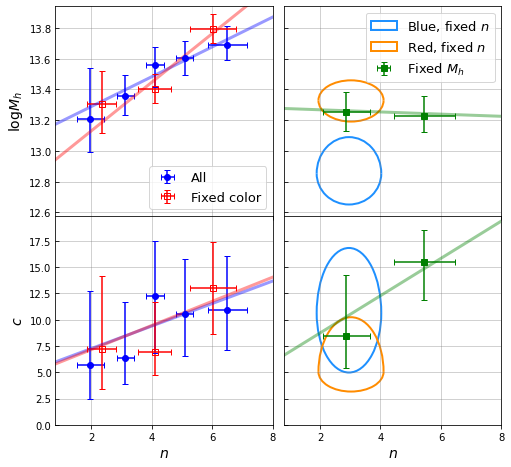

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.patches as patches
import emcee

def mcmcfit(x,y,dy):

    # 定义线性模型
    def model(params, x):
        k, b = params
        return k * x + b

    # 定义对数似然函数
    def log_likelihood(params, x, y, dy):
        model_y = model(params, x)
        sigma = np.zeros(len(x))
        indice=((y - model_y)>0.)
        sigma[indice]=dy[0,indice]
        indice=((y - model_y)<0.)
        sigma[indice]=dy[1,indice]
        return -0.5 * np.sum((y - model_y)**2 / sigma**2 )

    # 定义对数先验概率
    def log_prior(params):
        k, b = params
        if -5.0 < k < 5.0 and -20. < b < 40.0:
            return 0.0
        return -np.inf

    # 定义对数后验概率
    def log_probability(params, x, y, dy):
        lp = log_prior(params)
        if not np.isfinite(lp):
            return -np.inf
        return lp + log_likelihood(params, x, y, dy)

    # 初始化参数
    nwalkers = 10
    p0 = np.random.rand(nwalkers, 2) * 10  # 随机初始化参数
    p0[:, 0] =np.random.rand(nwalkers) * 10-5.  # 确保 k 在 -5 到 5 的范围内
    p0[:, 1] =np.random.rand(nwalkers) * 60-20  # 确保 b 在 0 到 10 的范围内

    # 设置MCMC采样器
    sampler = emcee.EnsembleSampler(nwalkers, 2, log_probability, args=(x, y, dy))

    # 运行MCMC采样
    sampler.run_mcmc(p0, 5000, progress=True)
    samples = sampler.get_chain()

    # 计算参数的均值和标准差
    nburn=200
    quantiles = np.array([16., 50., 84.])
    parameter_results = np.percentile(samples[nburn:,:,0].flatten(), quantiles)
    mean_k=parameter_results[1]
    std_k_minus=parameter_results[1]-parameter_results[0]
    std_k_plus=parameter_results[2]-parameter_results[1]

    parameter_results = np.percentile(samples[nburn:,:,1].flatten(), quantiles)
    mean_b=parameter_results[1]
    std_b_minus=parameter_results[1]-parameter_results[0]
    std_b_plus=parameter_results[2]-parameter_results[1]
    
    return mean_k,std_k_minus,std_k_plus,mean_b,std_b_minus,std_b_plus



sp_labels = [r'log$M_h$','$c$',r'$\sigma_s$',r'$f_c$']
files=["lensing_results/All/","lensing_results/Fixed_color/","lensing_results/Fixed_n/","lensing_results/Fixed_Mh/"]
cls=["b","r","darkorange","g"]
cls2=["dodgerblue","darkorange","g"]
mks=["o","s","s","s"]
mkfcs=["b","none","darkorange","g"]
lgnds=["All","Fixed color","Fixed color","Fixed $M_h$"]
lgnds2=["Blue, fixed $n$","Red, fixed $n$"]

fig,axes=plt.subplots(2,2,figsize=(8,7.7),sharex=True)
for ifl in range(len(sp_labels)):
    result=np.load(files[ifl]+"parameter_results-5par.npy")
    bl=5
    if(ifl == 0):
        bound=np.array([0.8,2.6,3.6,4.6,5.6,8.])
        nmean=np.array([1.97,3.12,4.1,5.08,6.49])
        nstd=np.array([0.438,0.289,0.2876,0.28812,0.64455])
    elif(ifl == 1):
        bound=np.array([0.8,3.,5,8.])
        nmean=np.array([2.348475544794188963e+00, 4.092162109375000689e+00, 6.017594862036157011e+00])
        nstd=np.array([4.811238096887333615e-01, 5.567454920480838787e-01, 7.693792663827956346e-01])
    elif(ifl == 2):
        bound=np.array([1,6])
        nmean=np.array([2.9574381703470034, 3.025020717131474])
        nstd=np.array([1.0680485033677916, 1.0764289955696436])
    else:
        bound=np.array([0.8,4,8])
        nmean=np.array([2.875397353931667954e+00, 5.453899687051482204e+00])
        nstd=np.array([7.866995457231391597e-01, 1.005044263262252047e+00])

    npoint=len(nmean)

    def linear_model(k,b, x):
        return k * x + b

    model = Model(linear_model)

    def errT(a):
        err=np.array(a)
        err1=np.zeros_like(err)
        err1[0,:]=err[1,:]
        err1[1,:]=err[0,:]
        return err1

    print(result.shape)
    for isig in range(2):
        logm=result[:,isig,0]
        err=[result[:,isig,1],result[:,isig,2]]
        err1=errT(err)

        if(ifl == 2):
            ax=axes[isig,1]
            for ipt in range(len(nmean)):
                center = (nmean[ipt], logm[ipt]) 
                radius_x = nstd[ipt]

                radius_y =err1[1,ipt]     
                theta1 = 0     
                theta2 = 180 
                arc = patches.Arc(center, 2 * radius_x, 2 * radius_y, angle=0, theta1=theta1, theta2=theta2, edgecolor=cls2[ipt], facecolor='none',linewidth=2)
                ax.add_patch(arc)

                radius_y =err1[0,ipt]     
                theta1 = 180     
                theta2 = 360 
                arc = patches.Arc(center, 2 * radius_x, 2 * radius_y, angle=0, theta1=theta1, theta2=theta2, edgecolor=cls2[ipt], facecolor='none',linewidth=2,label=lgnds2[ipt])
                ax.add_patch(arc)
        else:
            if(ifl == 3):
                ax=axes[isig,1]
            else:
                ax=axes[isig,0]

            k,kem,kep, b,bem,bep = mcmcfit(nmean,logm,err1)
            x_fit = np.linspace(bound[0],bound[-1], 100)
            y_fit = linear_model(k,b, x_fit)
            if(isig == 0):
                formatted_text=(r"$\frac{\partial {\rm log}M_h }{ \partial n}=$")#+str(round(k,bl))+"$\pm$"+str(round(ke,bl)))
            elif(isig == 1):
                formatted_text=(r"$\frac{\partial c}{ \partial n}=$")#+str(round(k,bl))+"$\pm$"+str(round(ke,bl)))
            print(formatted_text,k,kem,kep, b,bem,bep)
            ax.plot(x_fit, y_fit, '-',c=cls[ifl],alpha=0.4,linewidth=3)
            ax.errorbar(nmean,logm,xerr=nstd,yerr=err1,fmt=mks[ifl],c=cls[ifl], markerfacecolor=mkfcs[ifl],capsize=3,label=lgnds[ifl])
            if(ifl == 0):
                ax.set_ylabel(sp_labels[isig],fontsize=14)
                ax.set_xlim(bound[0],bound[-1])

axes[0,0].set_ylim(12.58,13.94)
axes[0,1].set_ylim(12.58,13.94)
axes[1,0].set_ylim(0,19.9)
axes[1,1].set_ylim(0,19.9)	
axes[0,0].legend(fontsize=13,loc="lower right")	
axes[0,1].legend(fontsize=13)	
axes[0,0].tick_params(axis='x', labelbottom=False)
axes[0,1].tick_params(axis='x', labelbottom=False)
axes[0,1].set_yticklabels([])
axes[1,1].set_yticklabels([]) 
axes[0,1].tick_params(axis='y', direction='in')
axes[1,1].tick_params(axis='y', direction='in')
axes[0,0].tick_params(axis='y', direction='in')
axes[1,0].tick_params(axis='y', direction='in')
axes[1,0].set_xlabel("$n$",fontsize=14)
axes[1,1].set_xlabel("$n$",fontsize=14)
axes[0,0].grid(True, color='gray',alpha=0.45)
axes[0,1].grid(True, color='gray',alpha=0.45)
axes[1,0].grid(True, color='gray',alpha=0.45)
axes[1,1].grid(True, color='gray',alpha=0.45)
fig.subplots_adjust(hspace=0.,wspace=0.05)
plt.savefig("lensing_results/n-fit-all.png",bbox_inches = 'tight')

# Figure 4

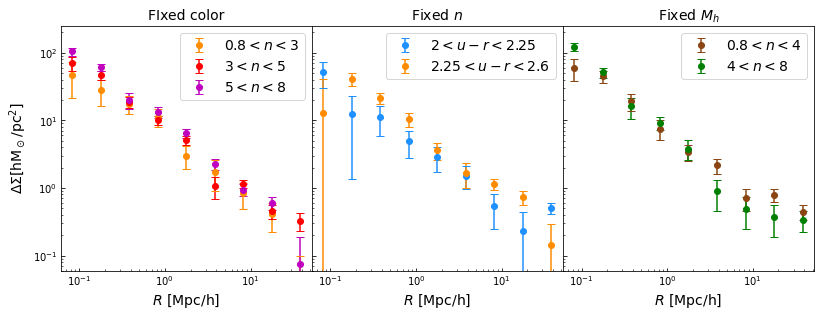

In [4]:
import numpy as np
import matplotlib.pyplot as plt

nrbin=9
rbin=np.logspace(np.log10(0.05),np.log10(50.),nrbin+1)
r=(rbin[1:]**3-rbin[:-1]**3)/(rbin[1:]**2-rbin[:-1]**2)*2./3.

savefile=["Fixed_color/","Fixed_n/","Fixed_Mh/"]
npoints=[3,2,2]
colors=['darkorange','r','m','dodgerblue','darkorange','saddlebrown','g']
labels=['$0.8<n<3$','$3<n<5$','$5<n<8$','$2<u-r<2.25$','$2.25<u-r<2.6$','$0.8<n<4$','$4<n<8$']
titles=['FIxed color','Fixed $n$','Fixed $M_h$']
fig, ax = plt.subplots(1, 3, figsize=(13.5, 4.5), sharey=True)
idata=0
for ax1 in range(3):
    fig_path="lensing_results/"+savefile[ax1]
    nsig=npoints[ax1]
    result=np.load(fig_path+"parameter_results-5par.npy")
        
    for isig in range(nsig):
        results_path=fig_path+"subsample"+str(isig+1)+"/"
        xi=np.loadtxt(results_path+"mean_Delta_Sigma.dat")
        cov=np.loadtxt(results_path+"Cov_Delta_Sigma.dat")
        ndata0=len(xi)

        err=np.zeros(ndata0)
        for i in range(ndata0):
            err[i]=np.sqrt(cov[i,i])

        ax[ax1].errorbar(r,xi,yerr=err,fmt='o',capsize=4,c=colors[idata],label=labels[idata])
        ax[ax1].tick_params(axis='both', which='both', direction='in')
        ax[ax1].set_title(titles[ax1],fontsize=14)
        ax[ax1].legend(fontsize=14)
        ax[ax1].set_yscale('log')
        ax[ax1].set_xscale('log')
        idata=idata+1

ax[0].set_ylim(0.06,250)
ax[0].set_ylabel(r'$\Delta \Sigma [{\rm h M_\odot /pc}^2]$',fontsize=14)
ax[0].set_xlabel(r'$R$ [Mpc/h]',fontsize=14)
ax[1].set_xlabel(r'$R$ [Mpc/h]',fontsize=14)
ax[2].set_xlabel(r'$R$ [Mpc/h]',fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('lensing_results/fit-paper-fixed-large_r.png',dpi=200,bbox_inches = 'tight')
